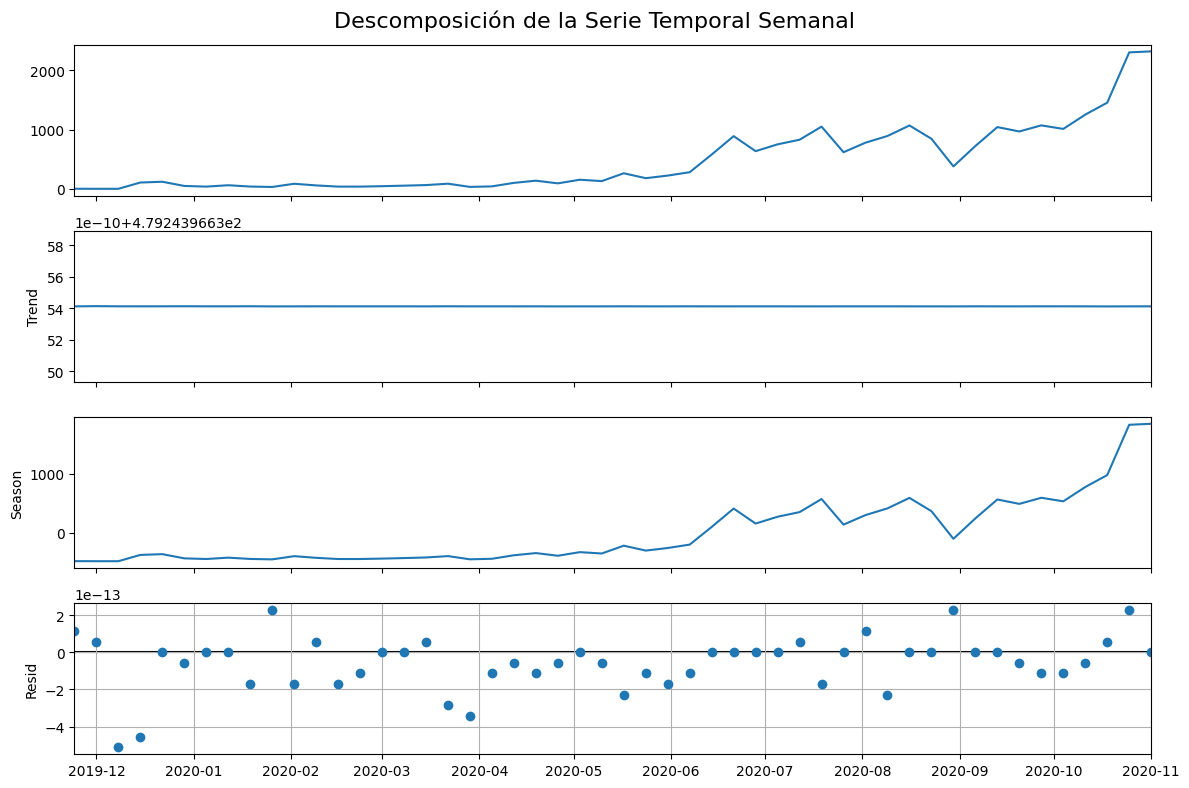

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools # Importando itertools para generar combinaciones de columnas
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.patches as mpatches
import payments_manager as pm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
# Importa la función para crear la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.tsa.seasonal import STL


cr_cp = pm.df('cr_cp')
#fe_cp = pm.df('fe_cp')
df_jo = pm.df('df_jo')
#display(df_jo)
df_s = cr_cp

# Asegurarnos de que `created_at` esté en formato datetime
df_s['created_at'] = pd.to_datetime(df_s['created_at'])

# Agrupar los datos por semana, contando la cantidad de préstamos por semana
df_weekly = df_s.resample('W', on='created_at').size()

# Aplicar la descomposición STL (Seasonal and Trend decomposition using LOESS)
stl = STL(df_weekly, seasonal=13)  # Usamos 13 para capturar la estacionalidad semanal
result = stl.fit()

# Graficar la descomposición
fig = result.plot()
fig.set_size_inches((12, 8)) 
plt.grid()
plt.suptitle('Descomposición de la Serie Temporal Semanal', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

df_s = pm.df('df_cp')
# Asegúrate de que `created_at` esté en formato datetime
df_s['created_at'] = pd.to_datetime(df_s['created_at'])

# Filtrar los préstamos devueltos correctamente
valid_principal_returned = ['approved', 'money_sent', 'money_back']  # Ajusta los valores según corresponda
df_valid = df_s[df_s['status'].isin(valid_principal_returned)]

# Extraer el número de semana del año (asegurándonos de que sea semanal)
df_valid['week_of_year'] = df_valid['created_at'].dt.isocalendar().week

# Contar los préstamos por cada semana
df_weekly_loans = df_valid.groupby('week_of_year').size().reset_index(name='loan_count')

# Asegurarse de que los datos estén ordenados por la semana
df_weekly_loans = df_weekly_loans.set_index('week_of_year').sort_index()

# Ahora necesitamos asegurarnos de que el índice esté en formato datetime y tenga frecuencia semanal.
# Crear una serie temporal con la frecuencia semanal
df_weekly_loans.index = pd.to_datetime(df_weekly_loans.index.astype(str) + '-0', format='%Y-W%U-%w')

# Comprobar la frecuencia del índice
df_weekly_loans = df_weekly_loans.asfreq('W')

# Aplicar la descomposición STL
stl = STL(df_weekly_loans['loan_count'], seasonal=13)  # Usamos 13 para capturar la estacionalidad semanal
result = stl.fit()

# Graficar la descomposición
fig = result.plot()
fig.set_size_inches((12, 8))
plt.grid()
plt.suptitle('Descomposición de la Serie Temporal Semanal', fontsize=16)
plt.tight_layout()
plt.show()


AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

df_s = pm.df('cr_cp')

# Asegúrate de que `created_at` esté en formato datetime
df_s['created_at'] = pd.to_datetime(df_s['created_at'])

# Filtrar los préstamos devueltos correctamente
valid_principal_returned = ['approved', 'money_sent', 'money_back']  # Ajusta los valores según corresponda
df_valid = df_s[df_s['status'].isin(valid_principal_returned)]

# Extraer el número de semana del año (asegurándonos de que sea semanal)
df_valid['week_of_year'] = df_valid['created_at'].dt.isocalendar().week

# Contar los préstamos por cada semana
df_weekly_loans = df_valid.groupby('week_of_year').size().reset_index(name='loan_count')

# Asegurarse de que los datos estén ordenados por la semana
df_weekly_loans = df_weekly_loans.set_index('week_of_year').sort_index()

# Aplicar la descomposición STL
stl = STL(df_weekly_loans['loan_count'], seasonal=13)  # Usamos 13 para capturar la estacionalidad semanal
result = stl.fit()

# Graficar la descomposición
fig = result.plot()
fig.set_size_inches((12, 8))
plt.grid()
plt.suptitle('Descomposición de la Serie Temporal Semanal', fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipykernel_63350/907913546.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['week_of_year'] = df_valid['created_at'].dt.isocalendar().week


ValueError: Unable to determine period from endog